In [53]:
import pandas as pd
from sklearn import datasets

In [54]:
data=datasets.load_boston()

In [55]:
a=data.target
a

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [56]:
data=pd.DataFrame(data.data,columns=data.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [57]:
data['medv']=a

In [58]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [59]:
data.shape

(506, 14)

In [60]:
X=data.iloc[:,0:13]
y=data.iloc[:,13].values

In [61]:
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [63]:
from keras.models import Sequential
from keras.layers import Dense

In [67]:
regressor = Sequential()
regressor.add(Dense(units=13, input_dim=13))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])

In [68]:
results=regressor.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
354/354 [==============================] - 1s 2ms/step - loss: 0.1798 - mean_absolute_error: 0.3188 - acc: 0.0028
Epoch 2/100
354/354 [==============================] - 0s 113us/step - loss: 0.1429 - mean_absolute_error: 0.2827 - acc: 0.0085
Epoch 3/100
354/354 [==============================] - 0s 113us/step - loss: 0.1226 - mean_absolute_error: 0.2555 - acc: 0.0085
Epoch 4/100
354/354 [==============================] - 0s 136us/step - loss: 0.1079 - mean_absolute_error: 0.2376 - acc: 0.0085
Epoch 5/100
354/354 [==============================] - 0s 90us/step - loss: 0.0941 - mean_absolute_error: 0.2199 - acc: 0.0113
Epoch 6/100
354/354 [==============================] - 0s 90us/step - loss: 0.0838 - mean_absolute_error: 0.2051 - acc: 0.0113
Epoch 7/100
354/354 [==============================] - 0s 68us/step - loss: 0.0748 - mean_absolute_error: 0.1938 - acc: 0.0113
Epoch 8/100
354/354 [==============================] - 0s 90us/step - loss: 0.0680 - mean_absolute_error: 0.1

354/354 [==============================] - 0s 90us/step - loss: 0.0121 - mean_absolute_error: 0.0765 - acc: 0.0395
Epoch 66/100
354/354 [==============================] - 0s 68us/step - loss: 0.0122 - mean_absolute_error: 0.0751 - acc: 0.0395
Epoch 67/100
354/354 [==============================] - 0s 113us/step - loss: 0.0121 - mean_absolute_error: 0.0786 - acc: 0.0395
Epoch 68/100
354/354 [==============================] - 0s 90us/step - loss: 0.0125 - mean_absolute_error: 0.0758 - acc: 0.0395
Epoch 69/100
354/354 [==============================] - 0s 68us/step - loss: 0.0134 - mean_absolute_error: 0.0877 - acc: 0.0424
Epoch 70/100
354/354 [==============================] - 0s 90us/step - loss: 0.0126 - mean_absolute_error: 0.0766 - acc: 0.0395
Epoch 71/100
354/354 [==============================] - 0s 68us/step - loss: 0.0119 - mean_absolute_error: 0.0764 - acc: 0.0395
Epoch 72/100
354/354 [==============================] - 0s 90us/step - loss: 0.0119 - mean_absolute_error: 0.0779 - 

In [69]:
y_pred= regressor.predict(X_test)
y_pred

array([[ 0.30943978],
       [ 0.54612714],
       [ 0.32556617],
       [ 0.25708485],
       [ 0.47861707],
       [ 0.47860894],
       [ 0.3146983 ],
       [ 0.3855166 ],
       [ 0.19654371],
       [ 0.6403549 ],
       [ 0.29286554],
       [ 0.654021  ],
       [ 0.36506394],
       [ 0.4125255 ],
       [ 0.679755  ],
       [ 0.10328551],
       [ 0.18342847],
       [ 0.26724383],
       [ 0.19925892],
       [ 0.35912156],
       [ 0.2650863 ],
       [ 0.18777785],
       [ 0.35682938],
       [ 0.48018435],
       [ 0.44442502],
       [ 0.19186   ],
       [ 0.36413246],
       [ 0.11976097],
       [ 0.15046403],
       [ 0.51114357],
       [ 0.28274882],
       [ 0.42865565],
       [ 0.83986366],
       [ 0.34108898],
       [ 0.37056398],
       [ 0.4185095 ],
       [ 0.28079292],
       [ 0.33258206],
       [ 0.2553278 ],
       [ 0.28018096],
       [ 0.6346363 ],
       [ 0.56752187],
       [ 0.06438884],
       [ 0.5991889 ],
       [ 0.23877618],
       [ 0

In [70]:
import matplotlib.pyplot as plt

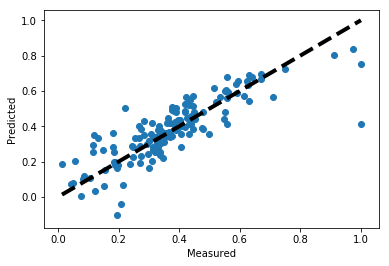

In [71]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [78]:
sc.inverse_transform(y_test[:5])

array([[20.1],
       [24.6],
       [19.9],
       [19.4],
       [29.8]])

In [77]:
sc.inverse_transform(y_pred[:5])

array([[18.92479 ],
       [29.575722],
       [19.650478],
       [16.568817],
       [26.537767]], dtype=float32)